# Module 4 - Business Analytics Model Development
In this notebook, we build and evaluate a regression model to predict Demand Forecast.


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# 2. Load Cleaned Dataset
data = pd.read_csv('../data/smart_logistics_dataset_cleaned.csv')

# Quick peek
data.head()


,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,...,Asset_Utilization,Demand_Forecast,Logistics_Delay,Hour,DayOfWeek,Month,Efficiency_Ratio,Has_Delay_Reason,Traffic_Level,Inventory_Category
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,0,27.0,67.8,1,38,...,60.1,285,1,0,Wednesday,3,0.730769,1,High,High
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,2,22.5,54.3,2,16,...,80.9,174,1,7,Wednesday,10,0.354379,1,High,High
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,2,25.2,62.2,1,34,...,99.2,260,0,18,Monday,7,1.368421,1,High,Low
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,1,25.4,52.3,2,37,...,97.4,160,1,0,Monday,10,0.484848,1,High,Medium
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,0,20.5,57.2,0,56,...,71.6,270,1,15,Friday,9,0.562500,1,High,High


In [4]:
# 3. Feature Preparation
# Drop columns not useful for regression (like IDs, Timestamp, etc.)
data_model = data.copy()

# Drop non-numeric or irrelevant columns
drop_cols = ['Timestamp', 'Asset_ID']  # and maybe 'Shipment_Status', 'Traffic_Status' if not encoded
data_model = data_model.drop(columns=drop_cols)

# Confirm numeric features left
data_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Latitude                 1000 non-null   float64
 1   Longitude                1000 non-null   float64
 2   Inventory_Level          1000 non-null   int64  
 3   Shipment_Status          1000 non-null   int64  
 4   Temperature              1000 non-null   float64
 5   Humidity                 1000 non-null   float64
 6   Traffic_Status           1000 non-null   int64  
 7   Waiting_Time             1000 non-null   int64  
 8   User_Transaction_Amount  1000 non-null   int64  
 9   User_Purchase_Frequency  1000 non-null   int64  
 10  Logistics_Delay_Reason   1000 non-null   int64  
 11  Asset_Utilization        1000 non-null   float64
 12  Demand_Forecast          1000 non-null   int64  
 13  Logistics_Delay          1000 non-null   int64  
 14  Hour                     

In [5]:
# 4. Define Target and Features
X = data_model.drop('Demand_Forecast', axis=1)  # Features
y = data_model['Demand_Forecast']              # Target


In [6]:
from sklearn.preprocessing import LabelEncoder

# Make a copy first
X = data_model.drop('Demand_Forecast', axis=1)

# Automatically find all non-numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# Now X is fully numeric


In [7]:
# 5. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training size: {X_train.shape[0]} samples")
print(f"Testing size: {X_test.shape[0]} samples")


Training size: 800 samples
Testing size: 200 samples


In [8]:
# 6. Build and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# 7. Model Evaluation

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')


R² Score: 0.6861
RMSE: 30.9373


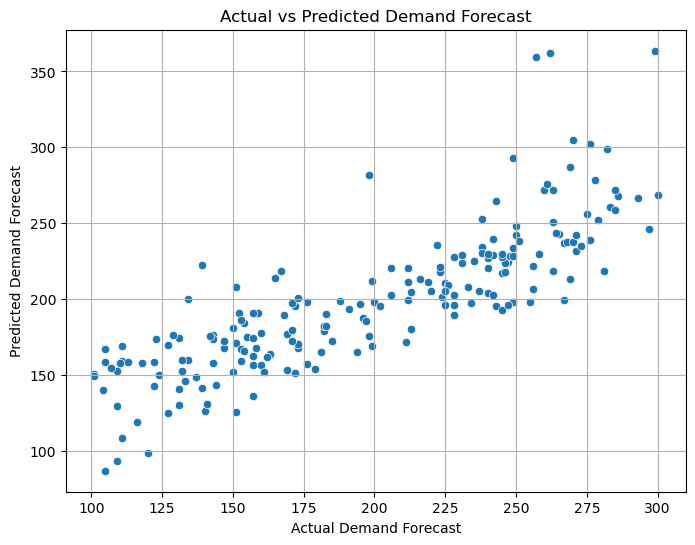

In [10]:
# 8. Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Demand Forecast')
plt.ylabel('Predicted Demand Forecast')
plt.title('Actual vs Predicted Demand Forecast')
plt.grid(True)
plt.show()


## Model Evaluation Results

- **R² Score:** 0.6861
  - The model explains approximately 68.61% of the variability in the demand forecast.
- **Root Mean Squared Error (RMSE):** 30.9373
  - On average, the model's predictions deviate by about 31 units from the actual demand.

### Interpretation:
- The model captures the majority of the trend in the demand data.
- However, further improvements may be possible by:
  - Using more complex models (e.g., Random Forest Regressor, XGBoost)
  - Performing additional feature engineering
  - Tuning model hyperparameters


# Random Forest Regressor
We now build a Random Forest Regressor to see if it can improve our demand forecasting model performance.


In [23]:
# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f'Random Forest R² Score: {r2_rf:.4f}')
print(f'Random Forest RMSE: {rmse_rf:.4f}')


Random Forest R² Score: 0.9797
Random Forest RMSE: 7.8656


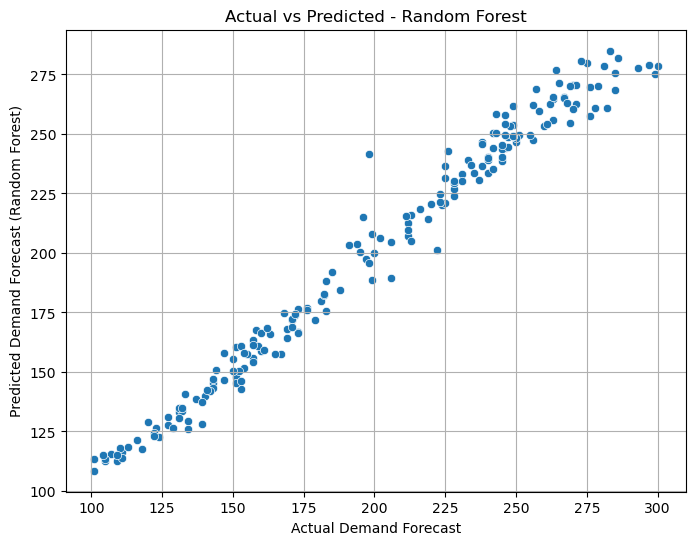

In [25]:
# Scatter plot for Random Forest predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Demand Forecast')
plt.ylabel('Predicted Demand Forecast (Random Forest)')
plt.title('Actual vs Predicted - Random Forest')
plt.grid(True)
plt.show()


## Model Comparison Summary

| Model | R² Score | RMSE |
|:------|:---------|:-----|
| Linear Regression | 0.6861 | 30.9373 |
| Random Forest Regressor | 0.9797 | 7.8656 |

### Interpretation:
- The Random Forest Regressor outperformed the Linear Regression model by a significant margin.
- It achieved a much higher R² Score and a much lower RMSE, indicating excellent predictive accuracy.
- The Random Forest model is recommended for demand forecasting in this project.


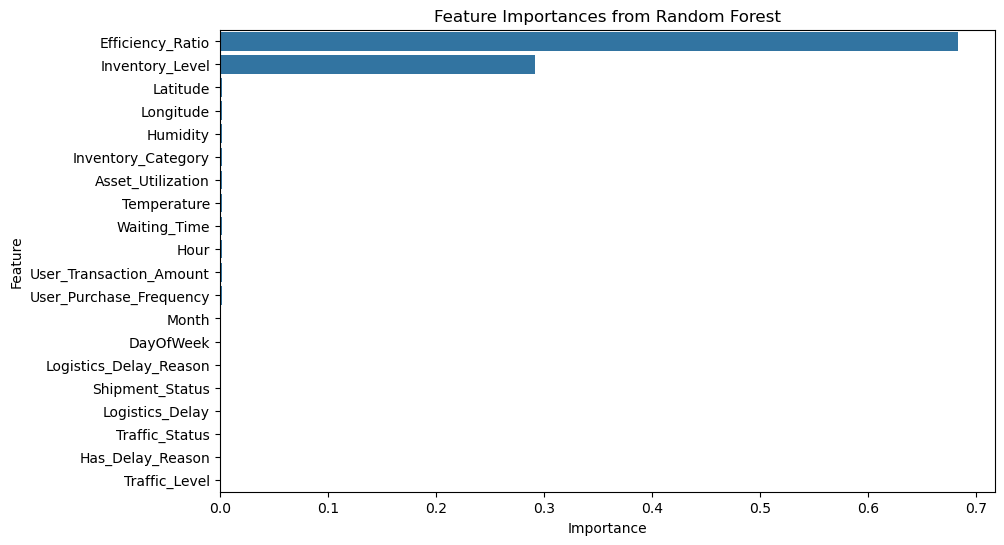

In [28]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feat_importances = feat_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title('Feature Importances from Random Forest')
plt.show()


## Feature Importance Analysis

The Random Forest Regressor provides insight into which features most heavily influence the Demand Forecast.

- **Efficiency_Ratio** emerged as the most critical feature for predicting demand.
- **Inventory_Level** was the second most influential variable.
- Other features, such as Latitude, Humidity, Asset Utilization, and Temperature, contributed marginally to the prediction.
- Features like Shipment Status, Traffic Status, and Logistics Delay Reason had very little impact on demand forecasting.

### Business Implication:
- Improving operational efficiency (Efficiency_Ratio) and managing inventory levels carefully can significantly enhance demand forecasting accuracy.
- This feature importance analysis can guide the company in prioritizing operational improvements for better supply chain efficiency.


# Conclusion and Recommendations

In this project, we developed and evaluated a predictive model for demand forecasting based on logistics data.

- The Linear Regression model achieved an R² score of **0.6861** and an RMSE of **30.94** units.
- The Random Forest Regressor significantly improved performance, achieving an R² score of **0.9797** and an RMSE of **7.87** units.
- Feature importance analysis revealed that Efficiency Ratio and Inventory Level are the dominant factors influencing demand.

## Recommendations:
- Focus on improving operational efficiency to better predict and meet customer demand.
- Monitor and optimize inventory levels as they directly impact demand forecasting.
- Deploy the Random Forest Regressor as the predictive model for future demand forecasts.
- Future work can involve hyperparameter tuning, more feature engineering, and exploring time series models.

Overall, the project successfully demonstrates the power of advanced machine learning models in enhancing business analytics capabilities.
